In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

# iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [338]:
digits = datasets.load_digits()

In [339]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
n_samples = X.shape[0]
images = X.reshape((n_samples, -1))

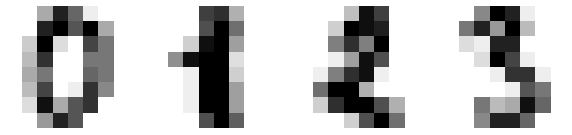

In [340]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [341]:
def student_pca(X, n_components):
    res = None
    # TODO -->
    xMean = X - X.mean(axis = 0)
    matrixCov = np.cov(xMean, rowvar = False)
    val , vec = np.linalg.eigh(matrixCov)
    vecSort = vec[:,np.argsort(val)[::-1]]
    res = np.dot(vecSort[:,0:n_components].transpose() , xMean.transpose()).transpose()
    # <--
    return res

In [342]:
# TODO --> 
X_pca = student_pca(X,32)

In [343]:
xMean = X - X.mean(axis=0)
matrixCov = np.cov(xMean, rowvar = False)
r_val , r_vec = np.linalg.eigh(matrixCov)
r_vec_sort = r_vec[:,(np.argsort(r_val)[::-1])]
arr = r_vec_sort[:,0:32]
r_X = np.dot(X_pca, arr.transpose())
r_X = r_X + X.mean(axis=0)

In [344]:
n_samples = r_X.shape[0]
images = r_X.reshape((n_samples, -1))

40.424704935093644


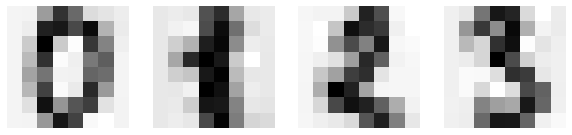

In [345]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

ocha = np.sum((X-r_X)**2, axis = 1).mean()
print(ocha)